## AB Testing Analysis in Python

## Using T Test
comparing the variance in the conversion rate by day for A vs B using the T Test

In [2]:

#Using sample data from: 

#https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/

In [3]:
#Get sample data from the blog:
!wget https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/data.csv

--2021-08-24 19:18:19--  https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/data.csv
Resolving cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)... 104.22.55.101, 104.22.54.101, 172.67.38.119, ...
Connecting to cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)|104.22.55.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408 [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]     408  --.-KB/s    in 0s      

2021-08-24 19:18:20 (68.3 MB/s) - ‘data.csv’ saved [408/408]



In [4]:
import os
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ab_testing.ipynb',
 'airflow-docker',
 'Connect to Google Sheets',
 'Connect to PostgreSQL Database',
 'convert_xml',
 'Data Science',
 'data.csv',
 'flask',
 'google_maps_api',
 'google_search_console_api',
 'julia',
 'put_to_sftp',
 'Python Interview Test Practices.ipynb',
 'twitter_api',
 'Web Scraping']

In [5]:
#Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 

In [7]:
#Import test data:
df_data = pd.read_csv("data.csv")

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [9]:
df_data.head(10)

Day   Conversion_A  Conversion_B
0     1          0.15          0.19
1     2          0.12          0.20
2     3          0.18          0.18
3     4          0.19          0.22
4     5          0.17          0.19
5     6          0.13          0.17
6     7          0.14          0.18
7     8          0.23          0.20
8     9          0.11          0.17
9    10          0.15          0.22

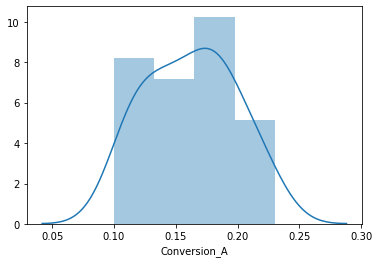

In [12]:
#plot outputs:

sns.distplot(df_data.Conversion_A)

In [13]:
sns.distplot(df_data.Conversion_B)

In [18]:
#Using scipy get T statistics and P values
t_stat, p_val= ss.ttest_ind(df_data.Conversion_B,df_data.Conversion_A)
t_stat , p_val

#P value is less than 0.05 so we can reject the null hypothesis

(3.78736793091929, 0.000363796012828762)

In [22]:
#Delete the csv sample file
try:
    os.remove("data.csv")
except:
    pass

## Towards Data Science Blog Post
https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f

In [24]:
# code examples presented in Python
bcr = 0.10  # baseline conversion rate
d_hat = 0.02  # difference between the groups that we want/need to see

In [25]:
# A is control; B is test
# In this example we decide to expose 1000 customers to each variant
N_A = 1000
N_B = 1000

In [26]:
import scipy.stats as scs
import pandas as pd
# import numpy as np


def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df

In [61]:
ab_data = generate_data(N_A, N_B, bcr, d_hat)

In [62]:
ab_data[ab_data["converted"] != 0].head()

group  converted
10     A          1
19     B          1
32     A          1
47     A          1
96     A          1

In [63]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   group      2000 non-null   object
 1   converted  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [64]:
#Summarise the df
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')

In [65]:
ab_summary

converted  total      rate
group                            
A             97   1002  0.096806
B             23    998  0.023046

NameError: name 'A_converted' is not defined

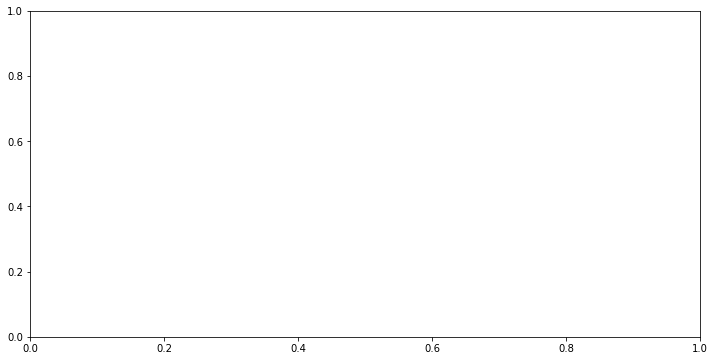

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')